### Thien Win, PE

### Project: Marketing A/B Testing

<b>Contact:</b> win.thien@gmail.com <br>
<b>LinkedIn:</b> https://www.linkedin.com/in/thien-win-pe/<br>
<b>GitHub:</b> https://github.com/win-thien<br>

<hr>

### Introduction

The focus of this notebook is to perform some exploratory data analysis on marketing data and determine if the marketing strategy was effective with A/B Testing. The data used in this notebook will be included in the associated repository.

<b> Premise: </b>

A marketing company is debating if a certain ad placement strategy is effective in customer conversion. The idea of the dataset is to analyze the different conversion rates of the different experimental groups to find if the ads were successful and if the difference between the groups is statistically significant.

Data dictionary:

- Index: Row index
- user id: User ID (unique)
- test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
- converted: If a person bought the product then True, else is False
- total ads: Amount of ads seen by person
- most ads day: Day that the person saw the biggest amount of ads
- most ads hour: Hour of day that the person saw the biggest amount of ads

The majority of the people will be exposed to ads (the experimental group). And a small portion of people (the control group) would instead see a Public Service Announcement (PSA or nothing) in the exact size and place the ad would normally be.

<hr>

### Setup

The first step in the process is to import the required libraries to be used, the dataset (included in the repository as a csv file) and familiarize oneself with the data available.

In [179]:
#import base libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
#read in csv file
df = pd.read_csv('marketing_AB.csv',)
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [189]:
#inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


The dataframe has been successfully created. It can be seen from the above that there does not seem to be any null values. For the next steps, the data will need to be cleaned, deeply inspected and organized so that further analysis can be possible.

<hr>

### Data Cleaning and Wrangling 

There are a few items that need to be addressed to clean the data and can be summarized as such:

- reset the index
- rename column names
- check for duplicates
- change 'converted' from boolean data type to integer (0 = no, 1 = yes)
- explicitly check for null values

The steps will be carried out in order.

In [190]:
#resetting index by dropping first column
df = df.iloc[: , 1:]
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [191]:
#rename columns
df.rename(columns={'user id':'user_id',
                  'test group':'test_group',
                  'total ads':'total_ads',
                  'most ads day':'most_ads_day', 
                  'most ads hour':'most_ads_hour',}, inplace=True)

df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [192]:
#checking for duplicates
print('Duplicates:', df.duplicated().sum())

Duplicates: 0


In [193]:
#checking data types
df.dtypes

user_id           int64
test_group       object
converted          bool
total_ads         int64
most_ads_day     object
most_ads_hour     int64
dtype: object

In [194]:
#check 'converted' totals to make sure it matches when we convert the datatype
df['converted'].value_counts()

False    573258
True      14843
Name: converted, dtype: int64

In [195]:
#convert boolean to binary
df['converted'] = df['converted'].astype('int')
df['converted'].value_counts()

0    573258
1     14843
Name: converted, dtype: int64

In [196]:
#checking for null items
print('Null Values in Data')
df.isnull().sum()

Null Values in Data


user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64

The data has been cleaned enough to be used for further analysis. At this point, a high level statistical understanding of the data can be inspected before diving deeper.

In [201]:
#checking stat details
df.describe().apply(lambda s: s.apply('{0:.3f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
user_id,588101.000,1310692.216,202225.983,900000.000,1143190.000,1313725.000,1484088.000,1654483.000
converted,588101.000,0.025,0.157,0.000,0.000,0.000,0.000,1.000
total_ads,588101.000,24.821,43.715,1.000,4.000,13.000,27.000,2065.000
most_ads_hour,588101.000,14.469,4.835,0.000,11.000,14.000,18.000,23.000


From the data above, the average conversion rate for both the 'ad' and 'psa' group is about 2.5%. In the next steps, a deeper dive into the data will be performed.

<hr>

### Exploratory Data Analysis

Data visualization is paramount to quick understanding of the data that can summarize and identify trends. A function for quick visual will be created for columns of interest.

In [202]:
#define function for plotting
def val_count(column):
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=column)
    plt.title(f'Value Count - {column}')
    plt.show()

    print(df[column].value_counts())

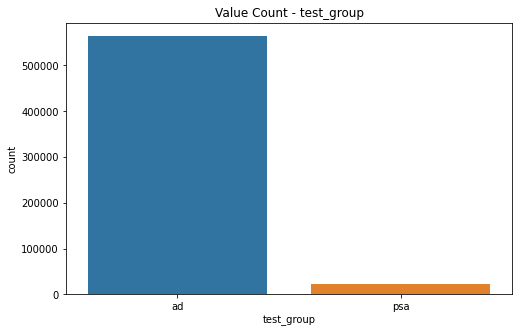

ad     564577
psa     23524
Name: test_group, dtype: int64


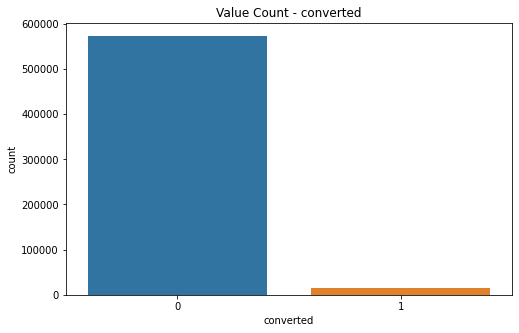

0    573258
1     14843
Name: converted, dtype: int64


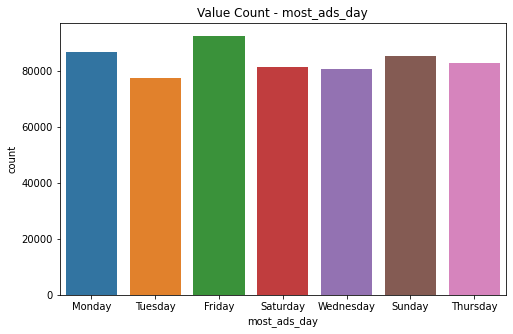

Friday       92608
Monday       87073
Sunday       85391
Thursday     82982
Saturday     81660
Wednesday    80908
Tuesday      77479
Name: most_ads_day, dtype: int64


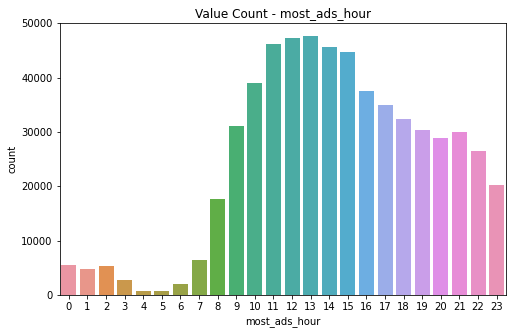

13    47655
12    47298
11    46210
14    45648
15    44683
10    38939
16    37567
17    34988
18    32323
9     31004
19    30352
21    29976
20    28923
22    26432
23    20166
8     17627
7      6405
0      5536
2      5333
1      4802
3      2679
6      2068
5       765
4       722
Name: most_ads_hour, dtype: int64


In [206]:
#create columns of interest
col_lst = df.columns[[1,2,4,5]]

#loop through columns of interest
for i in col_lst:
    val_count(i)

From the above, the following observations are made:

- the majority of users saw the ads as compared to those that saw the psa
- as determined before, the conversion rate overall is low (2.5%)
- the most ads seen by a user occurred on Friday
- between 10AM and 3PM, users saw the most ads



At this point, the data could be further distilled to better understand how the two groups interacted with the marketing changes. The first would be to see the conversion rate between the two groups.

In [213]:
#conversion rate of test group
pd.DataFrame(df.groupby('test_group').mean()['converted'])

,converted
test_group,
ad,0.025547
psa,0.017854


The group that saw the ads had a higher conversion rate than those that saw the psa or nothing. Before it can be said that the marketing campaign was a success, statistical testing needs to be done to confirm. This will be done in the following section.

To continue with the EDA, conversion rates by day will be evaluated as well as breaking the data down into groups.

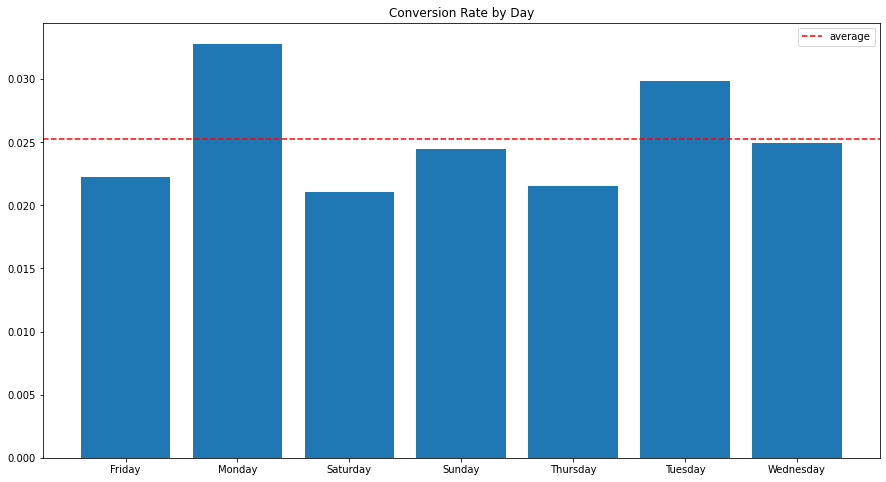

In [216]:
#visualize conversion by day
df_day_conv = pd.DataFrame(df.groupby('most_ads_day')['converted'].mean())
df_day_conv.reset_index(inplace=True)

plt.figure(figsize=(15,8))
plt.bar(data=df_day_conv, x='most_ads_day', height='converted')
plt.title('Conversion Rate by Day')
plt.axhline(df['converted'].mean(), color='r', linestyle='--', label='average')
plt.legend()
plt.show()

On Monday and Tuesday, conversion rates exceeded the average for the week.

Let's see the break down per group throughout the week for the different metrics recorded for the experiment.

In [117]:
#create data frame grouped by day and test group
df_ads_day = pd.DataFrame(df.groupby(by=['most_ads_day', 'test_group'])['total_ads'].sum())
df_ads_day['avg_ads_hour'] = df.groupby(by=['most_ads_day', 'test_group'])['most_ads_hour'].mean()
df_ads_day['converted'] = df.groupby(by=['most_ads_day', 'test_group'])['converted'].sum()
df_ads_day['conv_rate'] = df.groupby(by=['most_ads_day', 'test_group'])['converted'].sum() / df.groupby(by=['most_ads_day', 'test_group'])['converted'].count()

df_ads_day

total_ads  avg_ads_hour  converted  conv_rate
most_ads_day test_group                                               
Friday       ad            2369546     14.717493       1995   0.022465
             psa             94950     14.156455         62   0.016303
Monday       ad            2121848     14.620754       2778   0.033241
             psa             83582     14.308110         79   0.022559
Saturday     ad            1980043     14.714017       1679   0.021307
             psa             80048     14.312456         40   0.013996
Sunday       ad            2006360     14.381954       2027   0.024620
             psa             77493     14.444590         63   0.020595
Thursday     ad            1839933     14.524539       1711   0.021637
             psa            104240     14.237388         79   0.020230
Tuesday      ad            1792031     14.051950       2270   0.030440
             psa             61690     13.685243         42   0.014448
Wednesday    ad            1904940     14.258622       1963   0.025356
             psa             80478     14.926648         55   0.015759

In [158]:
#visualize day data
def day_visualize(column):
    plt.figure(figsize=(8,5))
    sns.barplot(data=df_ads_day.reset_index(), x='most_ads_day', y=column, hue='test_group')
    plt.xlabel('Day of the Week')
    plt.ticklabel_format(axis='y', style='plain')
    plt.title(f'{column} per Group by Day')
    plt.show()

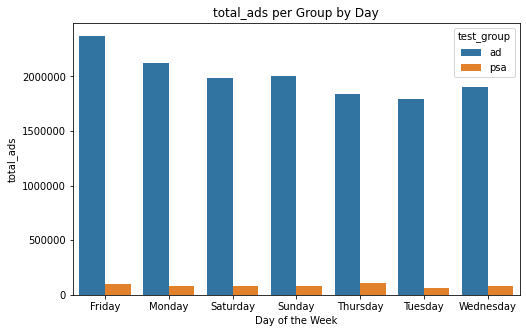

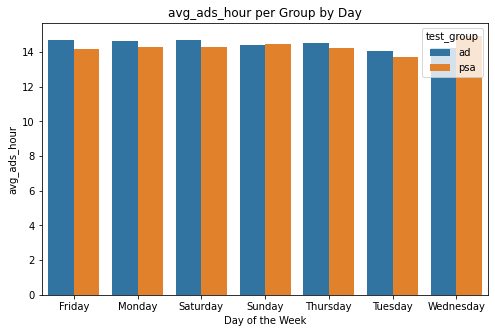

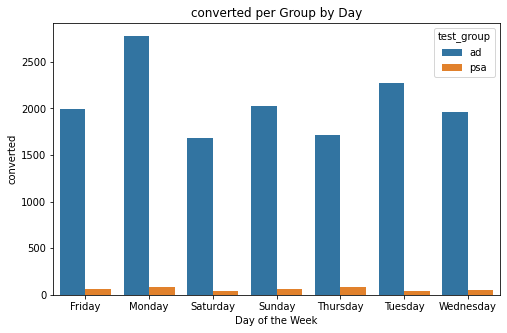

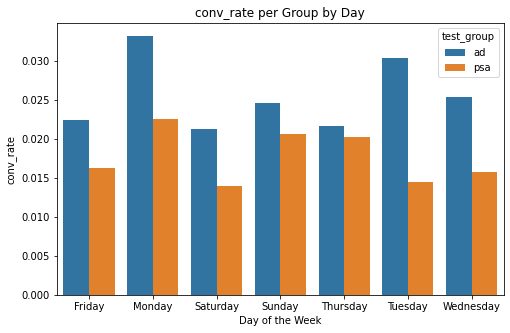

In [217]:
#loop through columns
for i in df_ads_day.columns:
    day_visualize(i)

Though additional analysis could be performed, this concludes the EDA section of the notebook. 

<hr>

### A/B Testing

As seen in the previous section, the group that saw the ads had a higher conversion rate than those that saw the psa. In order to solidify this claim, hypothesis testing needs to be conducted. For the purpose of the test, a proportions z-test will be performed.

Assuming that $p_A$ is the conversion rate for the ads group and $p_B$ is the conversion rate for the psa group, we care about testing:

$$ d = p_A - p_B $$

This allows us to set up the following hypothesis test:

$$ H_0 : d = 0 \; \; \; \text{vs}\; \; \; H_1 : d \neq 0 $$

For this test, the significance threshold will be 5%.

In [163]:
#import testing module
from statsmodels.stats.proportion import proportions_ztest

In [221]:
# number of converted for each group
conv = df.groupby('test_group').sum()['converted']
counts = [conv[0], conv[1]]
print('Converted Ads:', counts[0])
print('Converted PSA:', counts[1])

Converted Ads: 14423
Converted PSA: 420


In [222]:
# number of observations for each group
totals = df.groupby('test_group').count()['converted']
obs = [totals[0], totals[1]]
print('Total Observation Ads:', obs[0])
print('Total Observation PSA:', obs[1])

Total Observation Ads: 564577
Total Observation PSA: 23524


In [223]:
#test
print('p-value =', proportions_ztest(counts, obs)[1])

p-value = 1.7052807161559727e-13


From the test above, the p-value is significantly lower than the significance threshold at 5% which allows us to reject the null hypothesis. It looks like the marketing efforts were a success!

<hr>

### Conclusion

In this notebook, marketing data was imported, cleaned, visualized and statistically tested to conclude that the marketing efforts was effective in converting customers.